# Pra UTS
## Analisa Data Ecoli menggunakan tools KNIME

Spesifikasi tugas :  
pengumpulan data pake posgresql  
analisa data untuk pake tool knime  
buat script pyhton untuk analisa nya  
analisis outlier detection, unbalancing dataset, missing values

Langkah Langkah :

download tools KNIME dengan link https://www.knime.com/downloads 

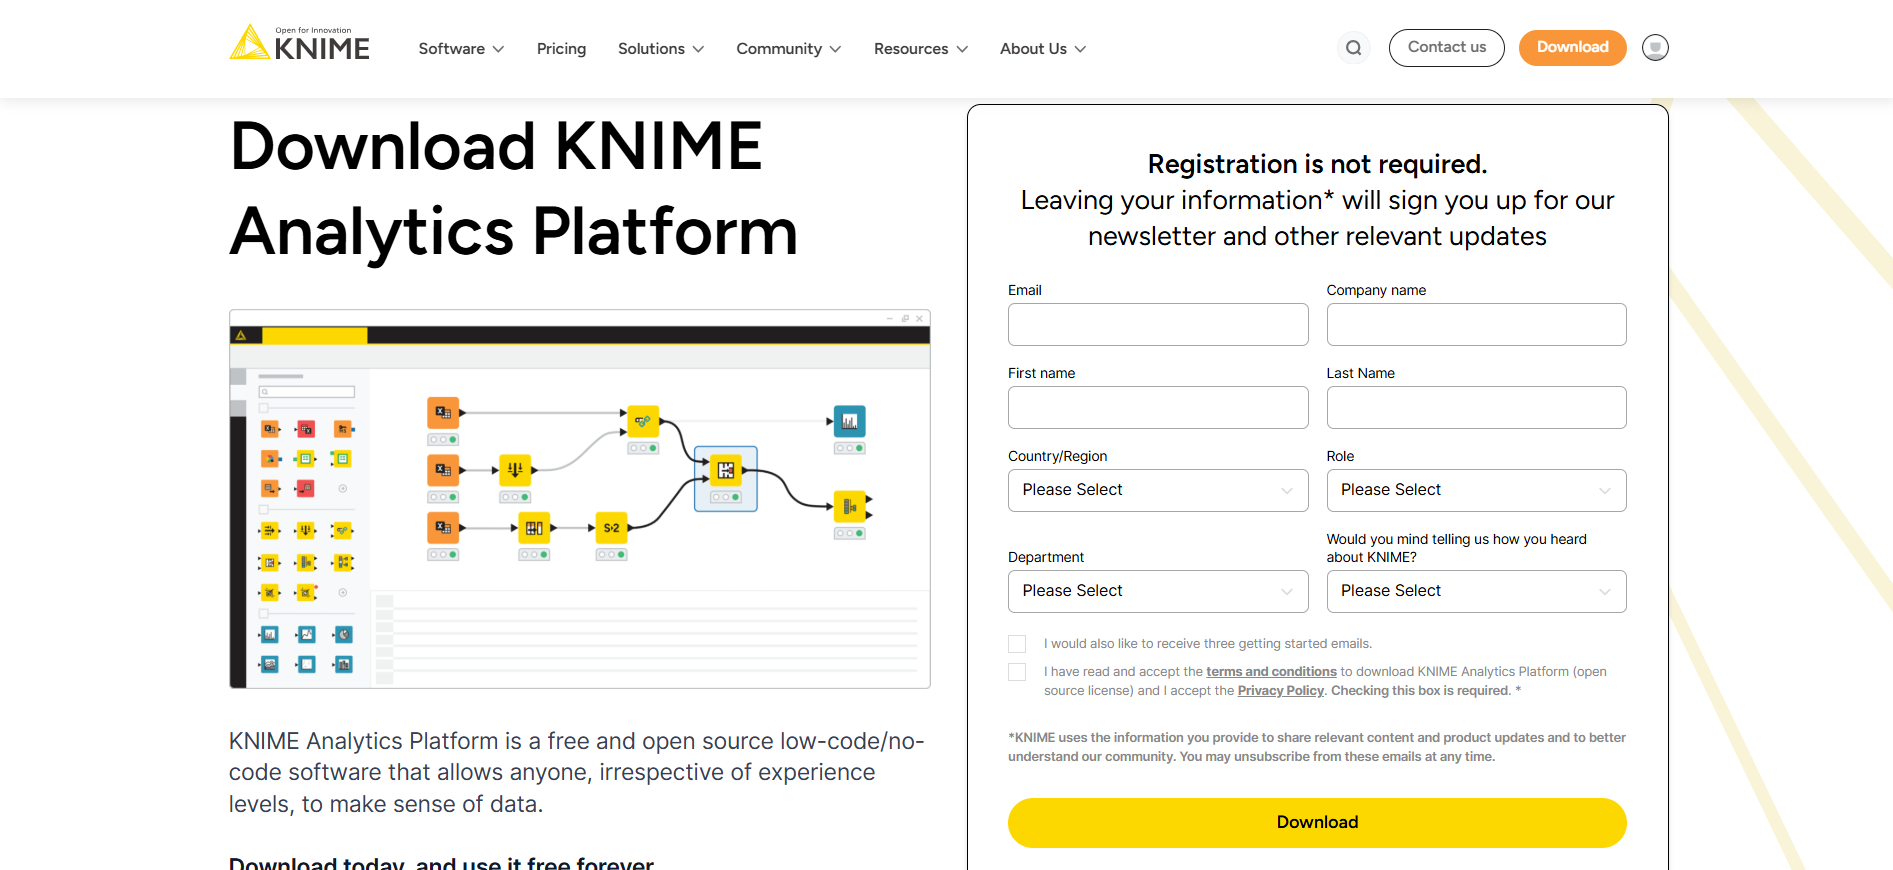

download driver postgresql dengan link postgressql https://jdbc.posgresql.org

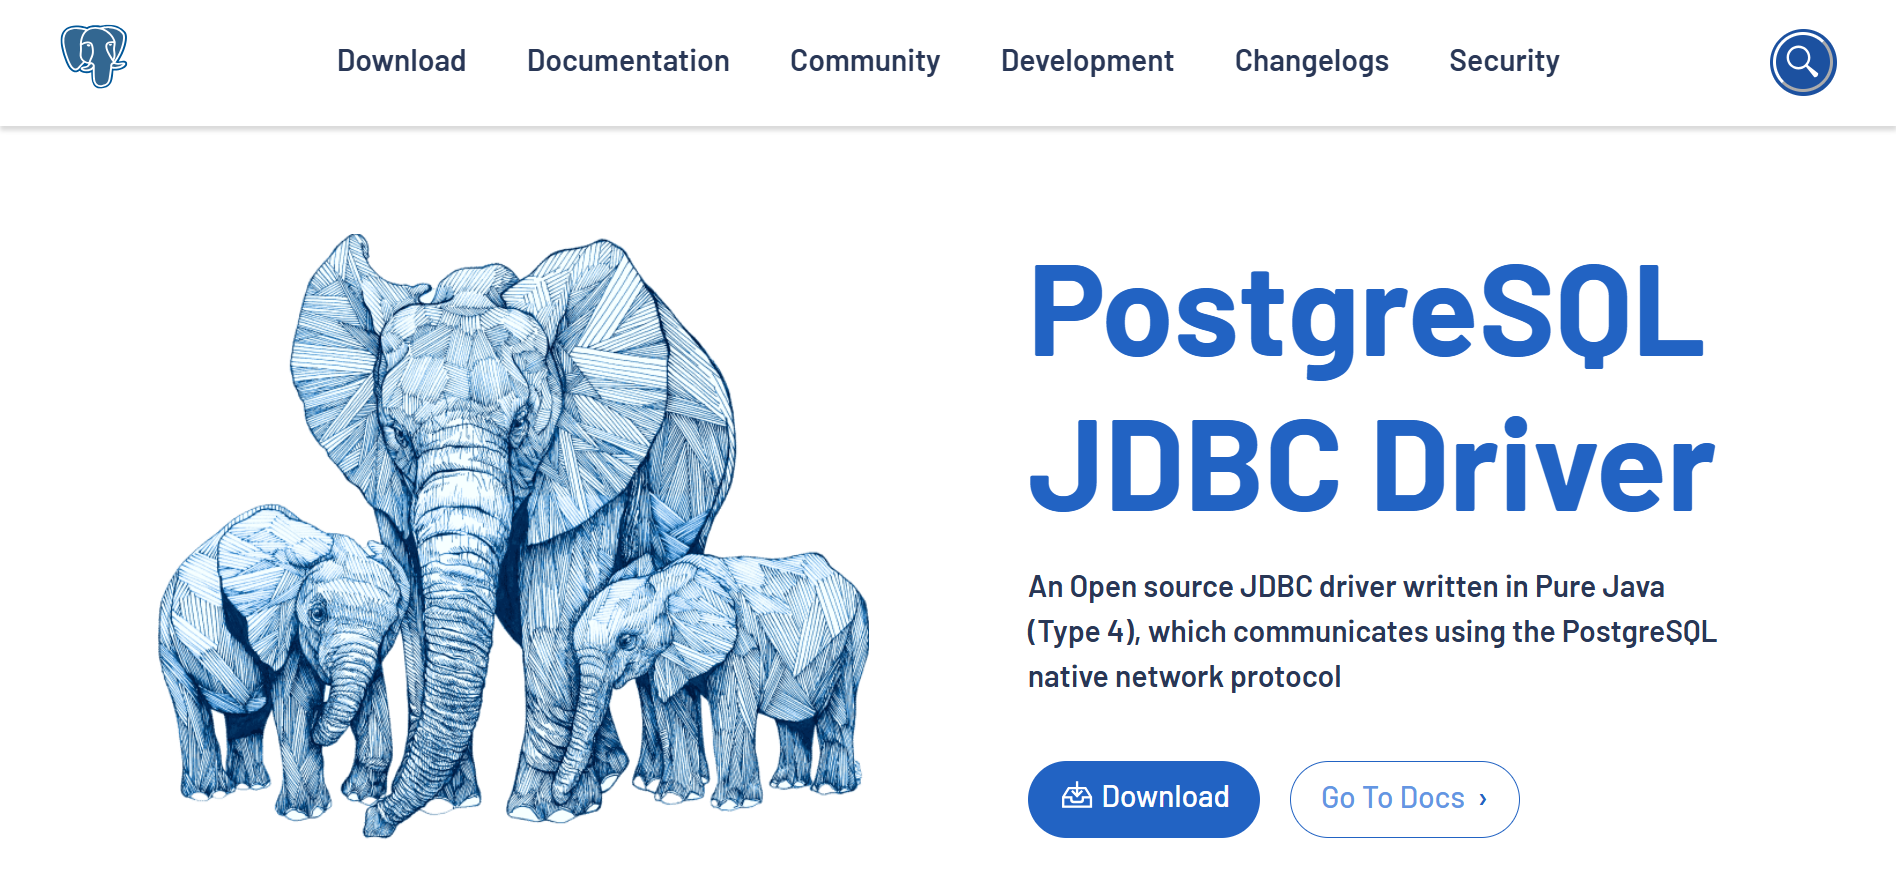

download anaconda sebagai env python di knime dengan link https://www.anaconda.com/download

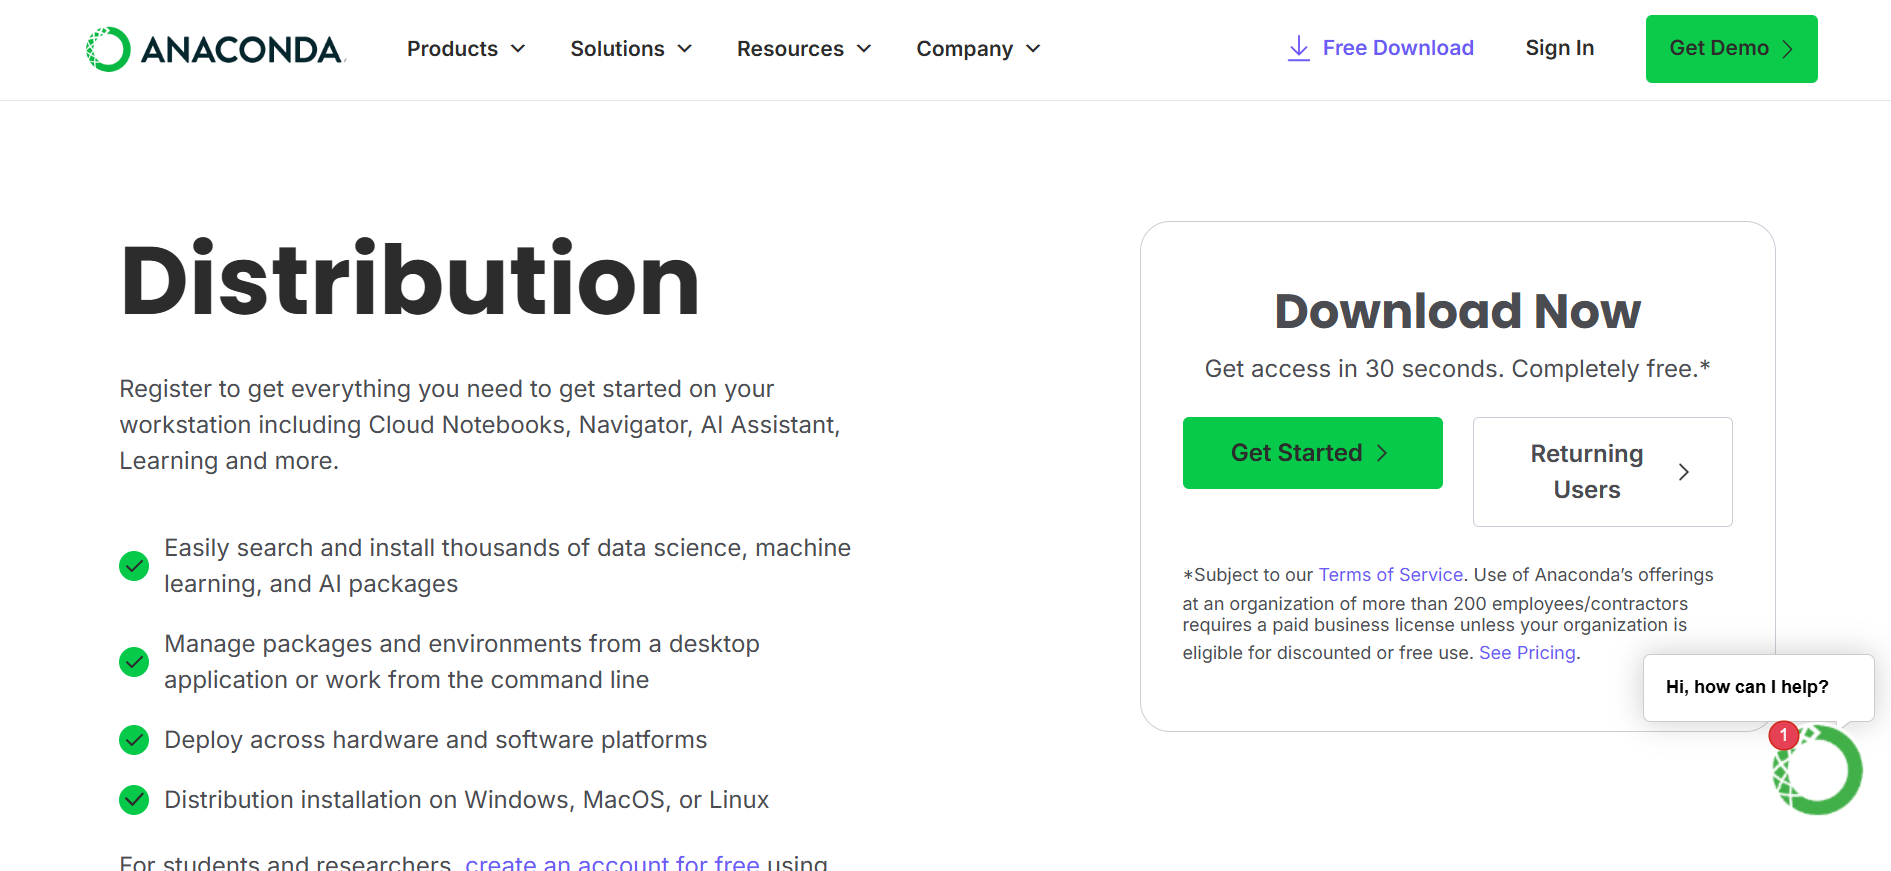

Kemudian buka tools KNIME drag/gunakan node postgresql connector(koneksi), DB table selector(select data), dan DB reader(pembaca data)  
Node postgresql connector dan DB table selector harus di konfigurasikan atau di sesuaikan terlebih dahulu dengan database postgresql yang digunakan agar bisa terhubung dengan cara klik kanan node tersebut dan ada opsi configure  

sebagai contoh  
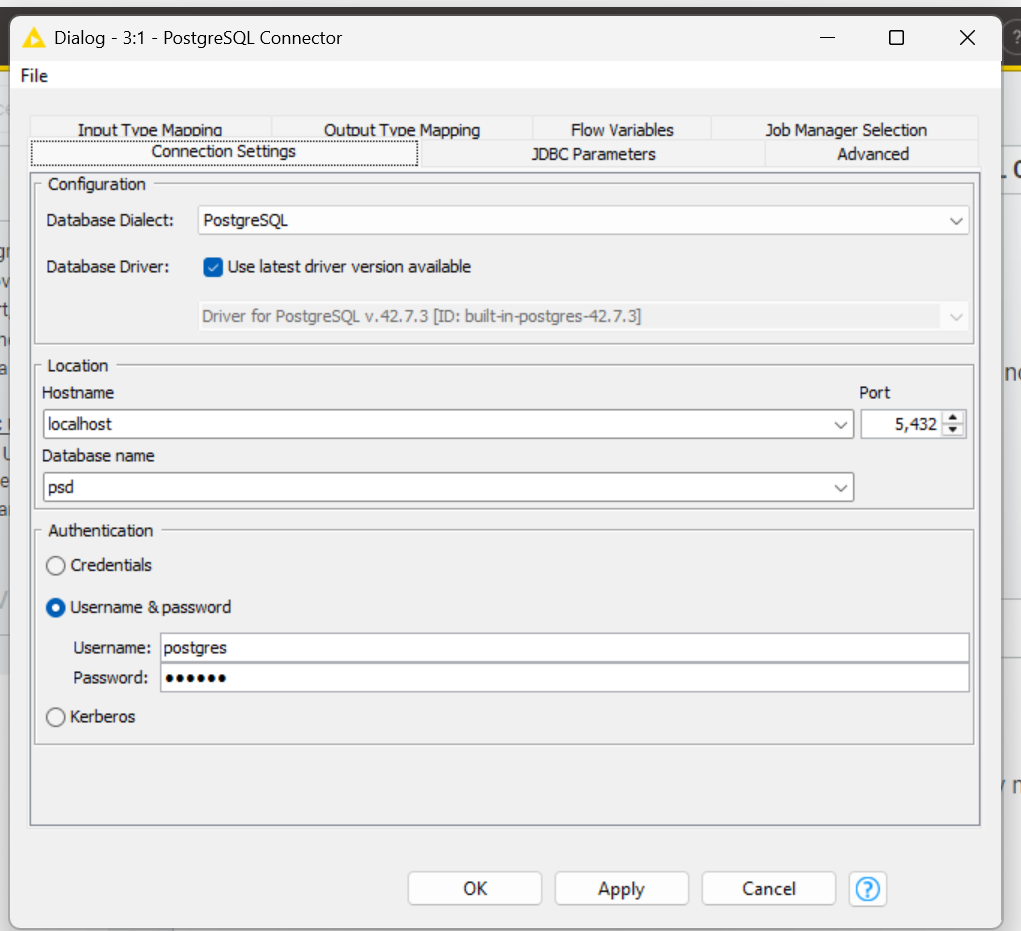

Sebelum kita jalankan/run node tersebut pastikan mysql terhubung/diaktifkan di xampp atau laragon
Hubungkan setiap node dan jalankan node secara berurutan

dan ketika sudah berjalan maka tampilannya akan seperti ini
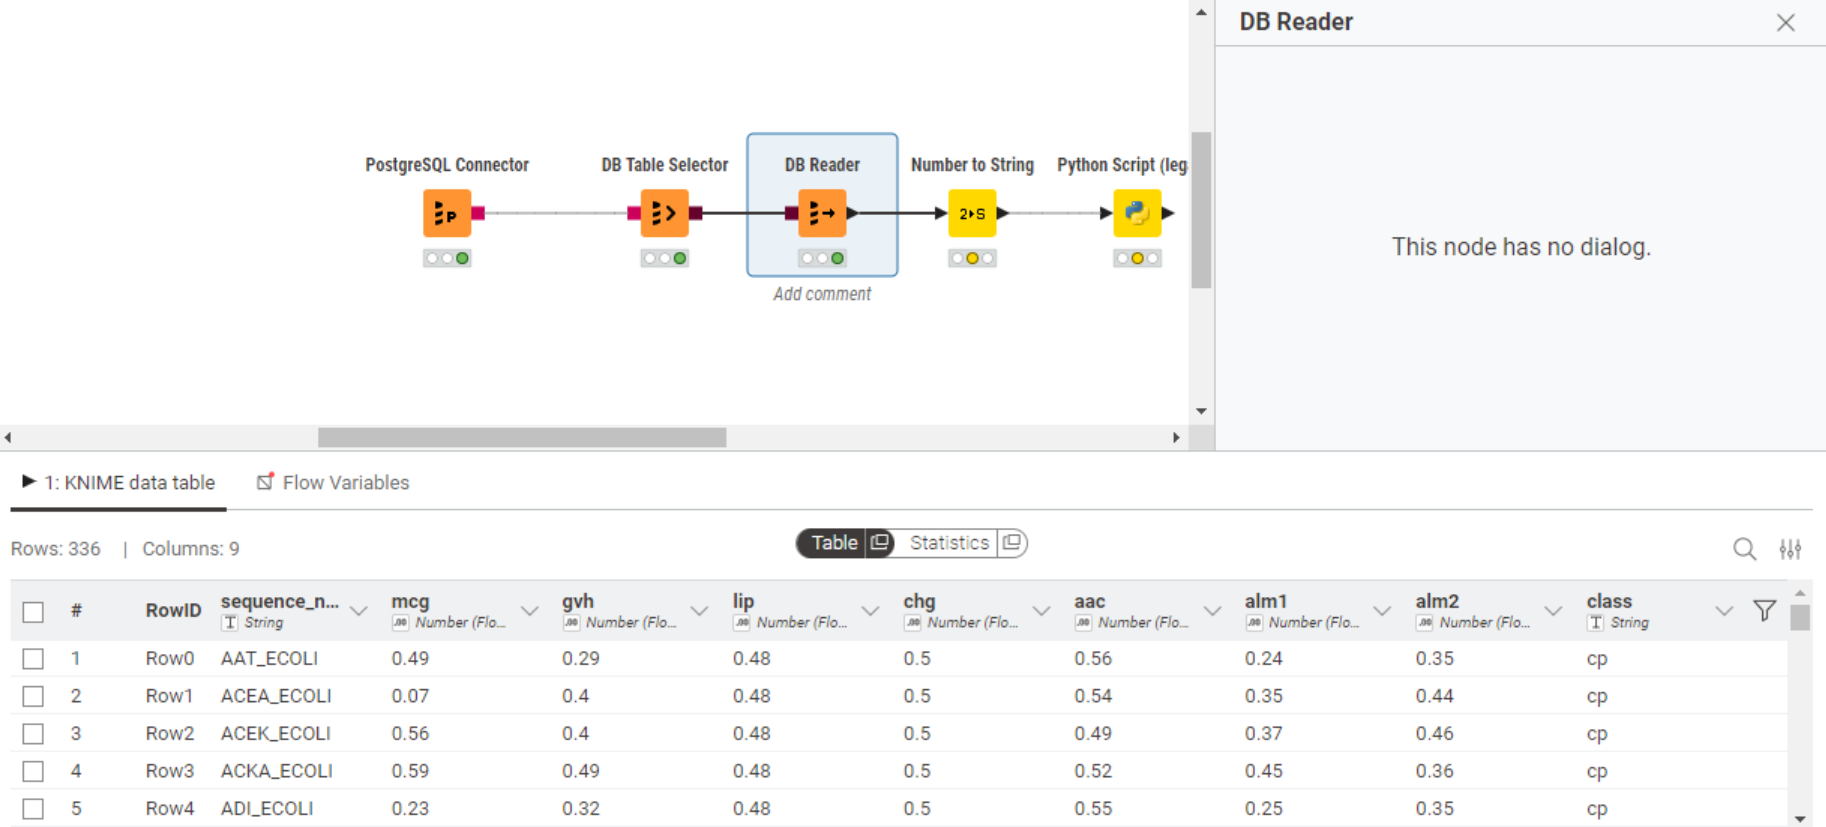



setelah itu tambahkan node number to string supaya ketika di analisa jadi 1 tipe data  

pastikan di kolom bagian kanan adalah fitur yang ingin di ubah tipe data nya

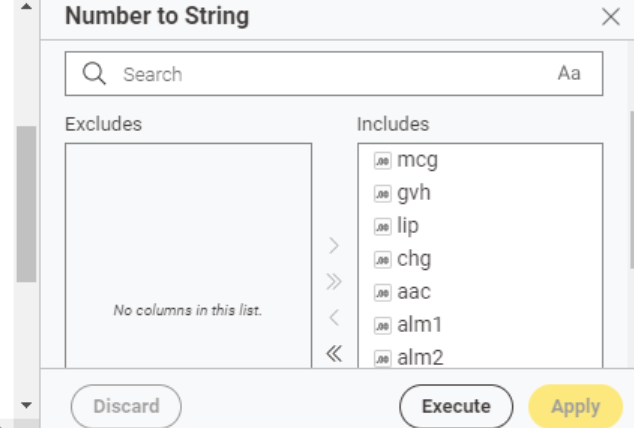

kemudian tambahkan node python script (legacy) untuk analisa nya

In [ ]:
import pandas as pd
import numpy as np

df = input_table_1.copy()

print("HASIL ANALISIS DATASET ECOLI")
print("\n")


print("1. Analisa Missing Values")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Jumlah Missing': missing_values, 'Persentase (%)': missing_percentage})

if missing_info['Jumlah Missing'].sum() > 0:
    print(missing_info[missing_info['Jumlah Missing'] > 0])
else:
    print("Tidak ditemukan adanya missing values pada dataset.")


print("2. Analisa Outlier (Metode IQR)")

numeric_cols = df.select_dtypes(include=np.number).columns
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Hitung jumlah outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)
    
    if num_outliers > 0:
        outlier_summary[col] = num_outliers

# Tampilkan ringkasan outlier
if outlier_summary:
    print("Jumlah outlier yang terdeteksi di setiap kolom:")
    for col, count in outlier_summary.items():
        print(f"- Kolom '{col}': {count} data outlier")
else:
    print("Tidak ditemukan outlier signifikan menggunakan metode IQR.")



print("3. Analisa Ketidakseimbangan Data (Unbalanced Data)")

target_col = 'class'

if target_col in df.columns:
    class_distribution = df[target_col].value_counts()
    class_percentage = df[target_col].value_counts(normalize=True) * 100
    balance_info = pd.DataFrame({'Jumlah': class_distribution, 'Persentase (%)': class_percentage.round(2)})
    
    print(f"Distribusi kelas pada kolom target '{target_col}':")
    print(balance_info)
    
    # Memberi kesimpulan sederhana tentang keseimbangan data
    if balance_info['Persentase (%)'].min() < 10:
        print("\nKesimpulan: Sangat tidak seimbang Dataset ini terindikasi highly unbalanced.")
    elif balance_info['Persentase (%)'].min() < 25:
        print("\nKesimpulan: Tidak seimbang Dataset ini terindikasi unbalanced.")
    else:
        print("\nKesimpulan: Cukup seimbang Dataset ini terlihat cukup seimbang.")
else:
    print(f"Peringatan: Kolom target '{target_col}' tidak ditemukan! Harap sesuaikan nama kolom di dalam skrip jika berbeda.")



output_table_1 = df

klik kanan pada node dan open view untuk melihat hasil analisa

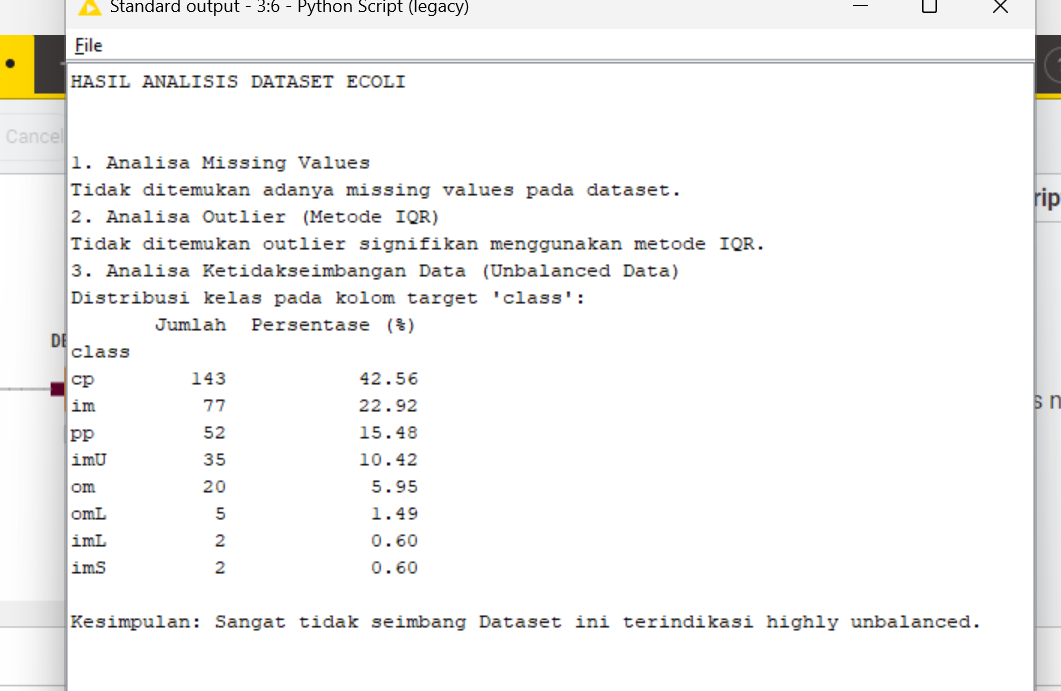